# Example 1: Query a table with SQL and magic commands

In [1]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results
SELECT * FROM `bigquery-public-data.ml_datasets.penguins` #this example uses a penguin public dataset. Learn more here: https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=penguins&page=table&_ga=2.251359750.1031997792.1692116300-1119797950.1692116300

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Dream,36.6,18.4,184.0,3475.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Dream,39.8,19.1,184.0,4650.0,MALE
2,Adelie Penguin (Pygoscelis adeliae),Dream,40.9,18.9,184.0,3900.0,MALE
3,Chinstrap penguin (Pygoscelis antarctica),Dream,46.5,17.9,192.0,3500.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Dream,37.3,16.8,192.0,3000.0,FEMALE
...,...,...,...,...,...,...,...
339,Adelie Penguin (Pygoscelis adeliae),Torgersen,38.8,17.6,191.0,3275.0,FEMALE
340,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.9,16.8,191.0,3700.0,FEMALE
341,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.0,17.1,191.0,3050.0,FEMALE
342,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.6,19.0,199.0,4000.0,MALE


/tmp/ipython-input-3-168121887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results, x='culmen_length_mm', y='species', inner='stick', palette='Dark2')


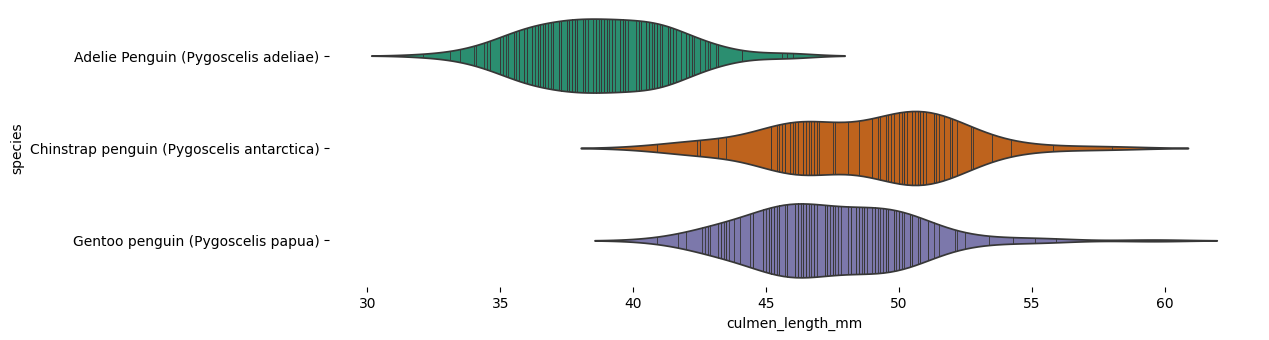

In [3]:
# @title species vs culmen_length_mm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='culmen_length_mm', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Example 2: Query a table with BigQuery DataFrames

In [4]:
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens in BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

# bf.options.bigquery.location = "[my_location]" #this variable is set based on the dataset you chose to query
# bf.options.bigquery.project = "[my_project]" #this variable is set based on the dataset you chose to query


In [5]:
# This example uses a penguin public dataset.
# Learn more here: https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=penguins&page=table&_ga=2.251359750.1031997792.1692116300-1119797950.1692116300
df = bf.read_gbq("bigquery-public-data.ml_datasets.penguins")

In [6]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,16.4,223.0,5950.0,MALE
1,Gentoo penguin (Pygoscelis papua),Biscoe,46.5,14.5,213.0,4400.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Biscoe,37.7,16.0,183.0,3075.0,FEMALE
3,Gentoo penguin (Pygoscelis papua),Biscoe,46.4,15.6,221.0,5000.0,MALE
4,Gentoo penguin (Pygoscelis papua),Biscoe,46.1,13.2,211.0,4500.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,43.1,19.2,197.0,3500.0,MALE
6,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,15.8,215.0,5300.0,MALE
7,Adelie Penguin (Pygoscelis adeliae),Dream,36.2,17.3,187.0,3300.0,FEMALE
8,Chinstrap penguin (Pygoscelis antarctica),Dream,46.0,18.9,195.0,4150.0,FEMALE
9,Gentoo penguin (Pygoscelis papua),Biscoe,54.3,15.7,231.0,5650.0,MALE
